In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
list(df.columns)

['booking_date',
 'bailed_out',
 'mh_treatment',
 'within_one',
 'within_two',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION 

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.all_var

['sexFEMALE',
 'sexMALE',
 'sexmissing',
 'mh_treatment',
 'pri_dx_valueADJUSTMENT DISORDER W/MIXED DISTURBANCE OF EMOTIONS & CONDCT',
 'pri_dx_valueADJUSTMENT DISORDER WITH ANXIETY',
 'pri_dx_valueADJUSTMENT DISORDER WITH DEPRESSED MOOD',
 'pri_dx_valueADJUSTMENT DISORDER WITH DISTURBANCE OF CONDUCT',
 'pri_dx_valueADJUSTMENT DISORDER WITH MIXED ANXIETY AND DEPRESSED MOOD',
 'pri_dx_valueADJUSTMENT DISORDER WITH MIXED EMOTIONAL FEATURES',
 'pri_dx_valueADJUSTMENT DISORDER, UNSPECIFIED',
 'pri_dx_valueADJUSTMENT REACTION WITH ANXIOUS MOOD',
 'pri_dx_valueADULT ANTISOCIAL BEHAVIOR',
 'pri_dx_valueAGORAPHOBIA WITH PANIC ATTACKS',
 'pri_dx_valueAGORAPHOBIA WITH PANIC DISORDER',
 'pri_dx_valueALCOHOL ABUSE, UNSPECIFIED',
 'pri_dx_valueALCOHOL DEPENDENCE, IN REMISSION',
 'pri_dx_valueALCOHOL DEPENDENCE, UNCOMPLICATED',
 'pri_dx_valueALCOHOL WITHDRAWAL DELIRIUM',
 'pri_dx_valueAMPHETAMINE AND OTHER PSYCHOSTIMULANT DEPENDENCE',
 'pri_dx_valueAMPHETAMINE OR RELATED ACTING SYMPATHOMIMETIC ABUSE

In [9]:
#Running on All the var including mental health and bail var
x_train = x_train[final_options.all_var]
x_test = x_test[final_options.all_var]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
38,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.6214,0.3145,0.0667,"(0.4835, 0.1209, 0.1934)","(0.4313, 0.2157, 0.2875)","(0.3324, 0.3324, 0.3324)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.7626,0.4451,3.2488,"(0.5495, 0.1374, 0.2198)","(0.522, 0.261, 0.348)","(0.4588, 0.4588, 0.4588)"
83,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.7545,0.4109,0.7290,"(0.533, 0.1332, 0.2132)","(0.4863, 0.2431, 0.3242)","(0.4492, 0.4492, 0.4492)"
44,Logit,"{'C': 0.1, 'penalty': 'l1'}",0.7596,0.4295,0.4069,"(0.544, 0.136, 0.2176)","(0.4918, 0.2459, 0.3278)","(0.456, 0.456, 0.456)"
114,NB,{},0.7182,0.3690,0.2442,"(1.0, 0.25, 0.4)","(0.7088, 0.3544, 0.4725)","(0.4382, 0.4382, 0.4382)"
11,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.7561,0.4224,2.9059,"(0.5385, 0.1346, 0.2154)","(0.5055, 0.2527, 0.337)","(0.4464, 0.4464, 0.4464)"
71,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.7378,0.3960,0.0483,"(0.5275, 0.1319, 0.211)","(0.5165, 0.2582, 0.3443)","(0.4423, 0.4423, 0.4423)"


In [12]:
best

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [2],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [5]}}

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [14]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [15]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [16]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.217857,0.506572,0.514924,0.839932,1.0,0.905110,0.329851
3164,475,134.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.217857,0.504448,0.516268,0.839932,1.0,0.902189,0.329851
2455,475,NaN,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.252857,0.505578,0.502606,0.814000,1.0,0.882047,0.329851
2454,475,419.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.252857,0.502387,0.488325,0.814000,1.0,0.835901,0.329851
2191,475,1846.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16004657,16DV00472,...,MALE,KS,66061,0.252857,0.499129,0.486372,0.814000,1.0,0.835030,0.329851
7149,456,762.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003822,16CR00488,...,MALE,KS,66212,0.289524,0.504794,0.424106,0.730626,1.0,0.831949,0.574156
6984,456,127.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003975,16DV00371,...,MALE,KS,66212,0.302024,0.504350,0.472806,0.849045,1.0,0.812801,0.575503
14058,278,5.0,36.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15013645,15DV01506,...,MALE,KS,66203,0.257262,0.502268,0.459557,0.718855,1.0,0.808223,0.639810
8536,591,-17.0,39.0,OLATHE P.D.,CITY,10000.0,SUR,1,16001667,16DV00164,...,MALE,KS,66204,0.341190,0.502830,0.492251,0.746769,1.0,0.808169,0.352500
7150,456,NaN,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003822,16CR00488,...,MALE,KS,66212,0.302024,0.502670,0.440564,0.730626,1.0,0.800437,0.575503


In [17]:
def plotting_curves (dataframe, feature):
    '''
    Given a dataframe, a column name, 
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        feature: column name (string)
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    title = feature + ' Graph'
    ax = sns.distplot(dataframe[feature])
    ax.set_title(title)


In [19]:
def value_counter (dataframe, feature):
    '''
    Given a dataframe, and feature,
        gives the number of occurrences of each value in that feature column
        
    Input:
        dataframe
        feature: string
    
    Output: dataframe
    '''
    return dataframe[feature].value_counts()

In [18]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

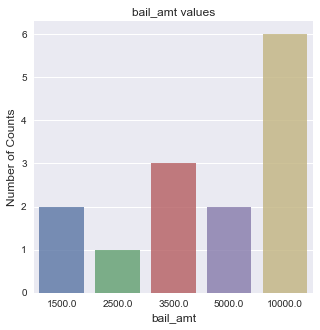

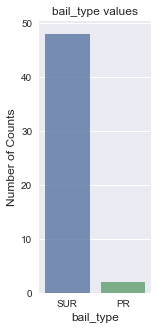

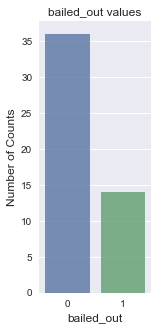

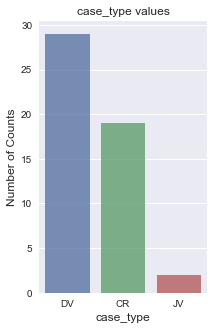

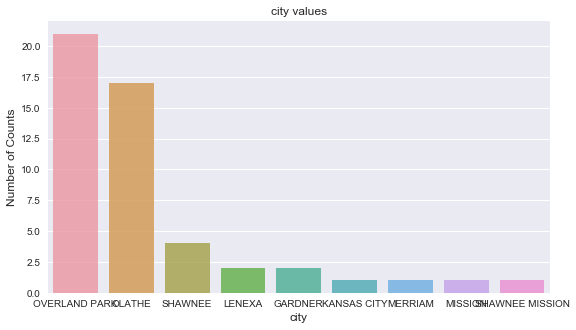

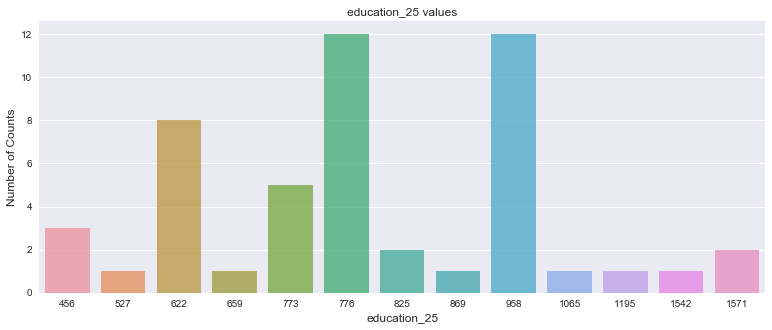

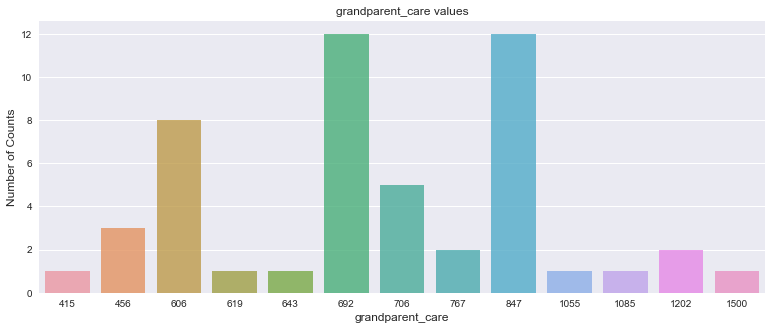

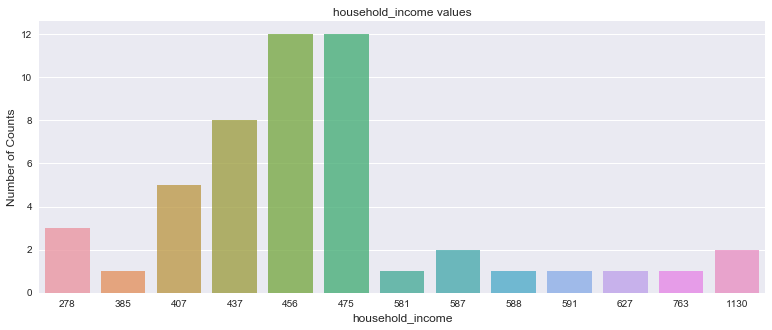

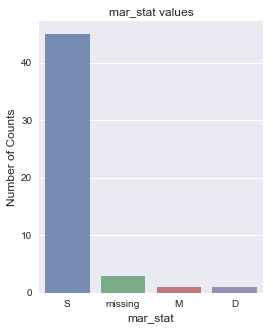

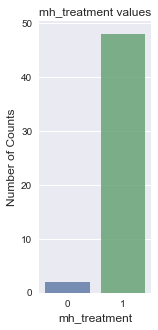

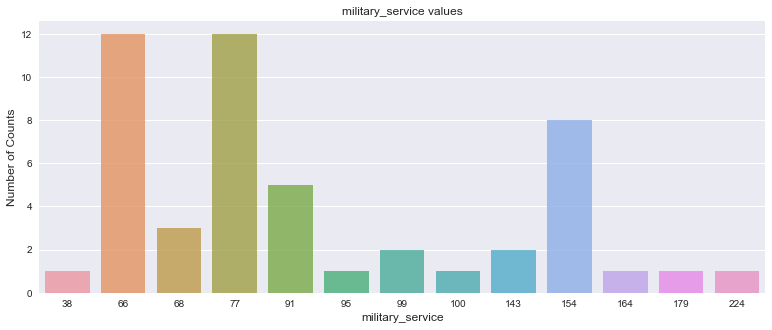

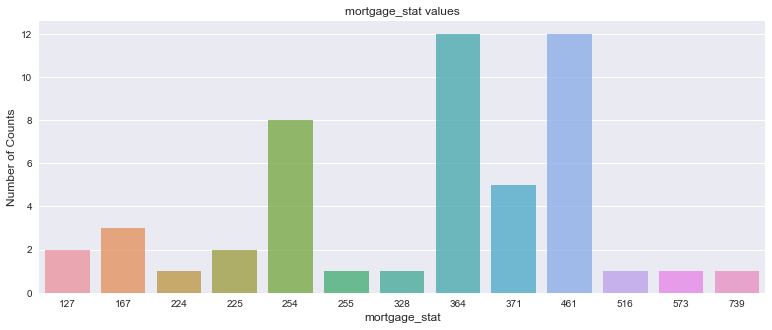

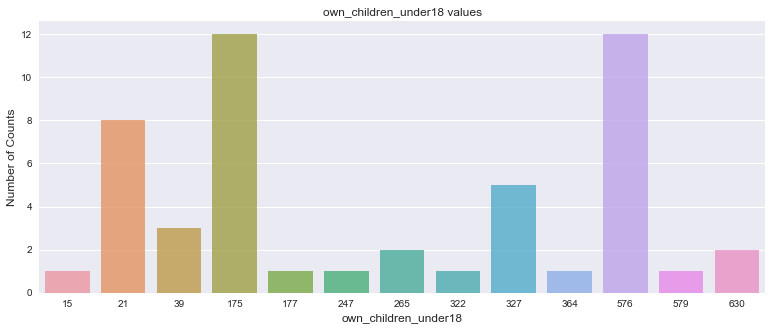

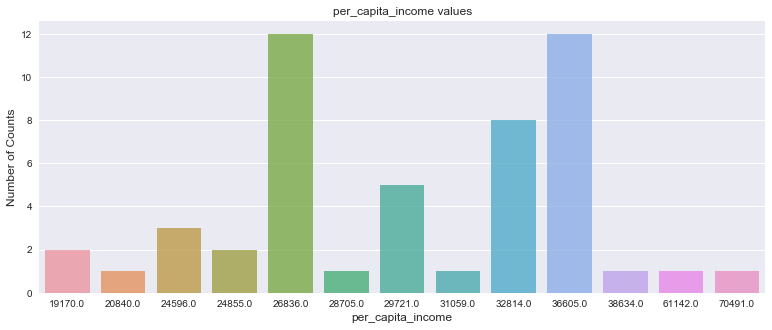

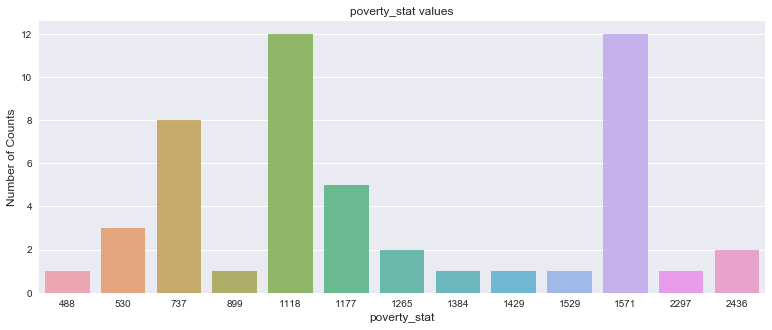

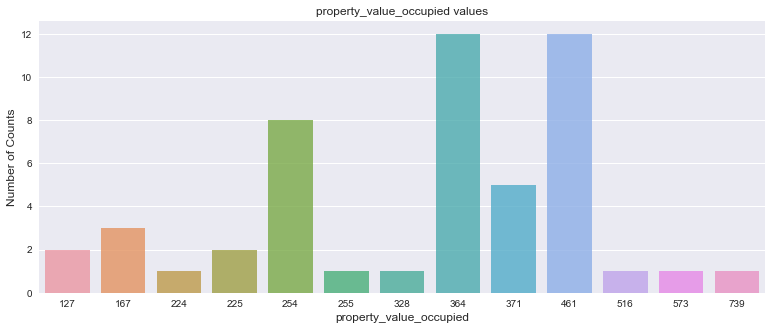

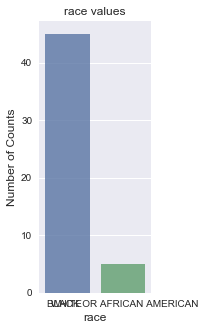

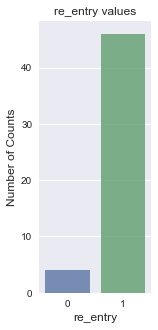

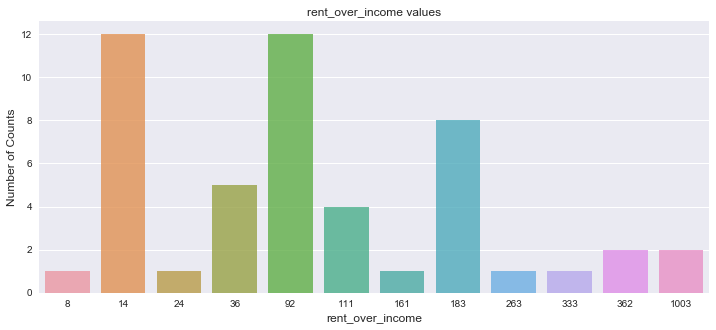

In [19]:
final_plot.plot_df(RF_df[:50], features_to_see, save=False)

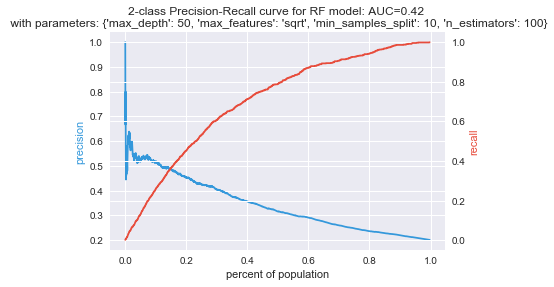

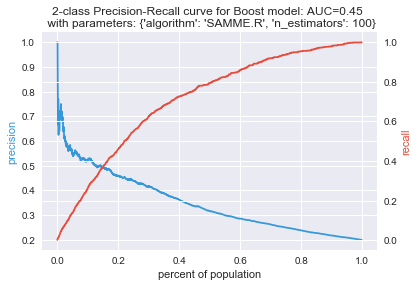

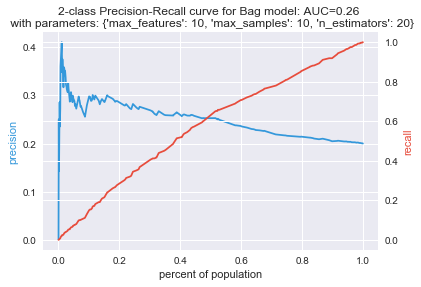

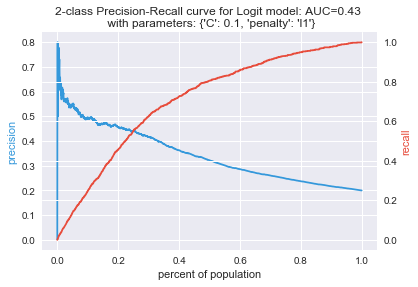

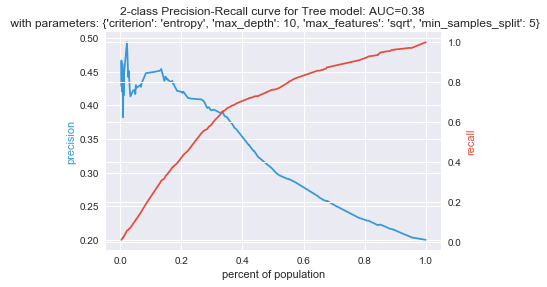

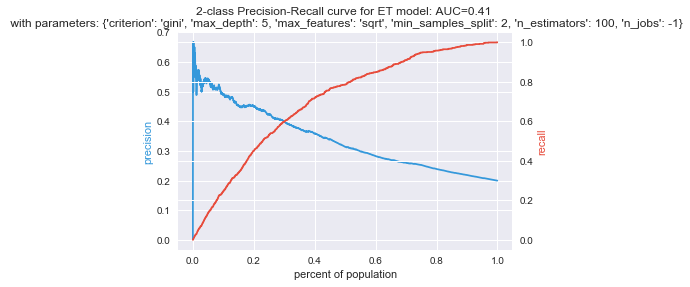

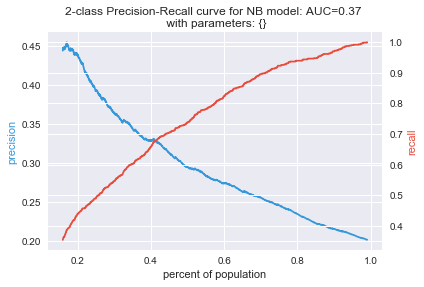

In [20]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

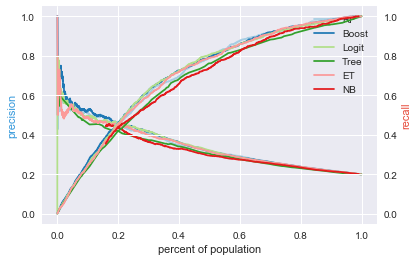

In [21]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. refferal_sourceOTHERS (0.192764)
2. mh_treatment (0.178470)
3. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.173045)
4. bailed_out (0.065643)
5. refferal_sourceSELF (0.062001)
6. bail_typeSUR (0.040525)
7. bail_amt_bin1 (0.027247)
8. case_typeJV (0.027110)
9. pri_dx_valuemissing (0.027063)
10. case_typeCR (0.023542)
11. age_bin1 (0.015768)
12. bail_typePR (0.011971)
13. pri_dx_valueMANIC DEPRESSIVE PSYCHOSIS, UNSPECIFIED (0.010169)
14. pri_dx_valueSCHIZOPHRENIC DISORDER, SCHIZO-AFFECTIVE TYPE, UNSPEC (0.009667)
15. pri_dx_valueDEPRESSIVE DISORDER NOS (0.009537)
16. per_capita_income_bin3 (0.007505)
17. case_typeDV (0.006981)
18. age_bin4 (0.006853)
19. pri_dx_valueUNSPECIFIED PSYCHOSIS (0.005137)
20. mar_statM (0.005066)


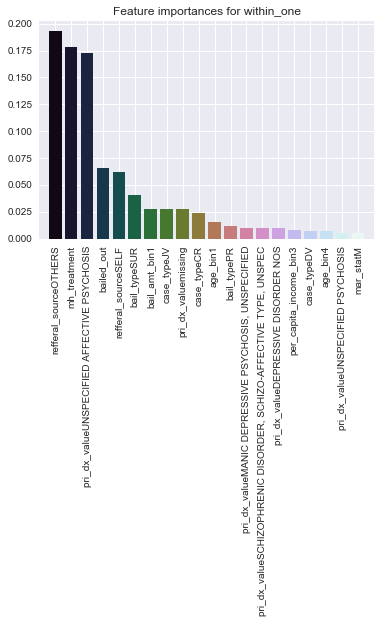

In [22]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET",20)

In [25]:
########Running everything on second y within two year of re-entry

In [23]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [24]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
26,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.5995,0.3449,0.0605,"(0.544, 0.1054, 0.1766)","(0.4643, 0.18, 0.2594)","(0.3942, 0.3056, 0.3443)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.7577,0.5129,3.5750,"(0.6484, 0.1257, 0.2105)","(0.6071, 0.2354, 0.3392)","(0.5495, 0.426, 0.4799)"
109,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.7570,0.5151,1.8600,"(0.6593, 0.1278, 0.2141)","(0.5989, 0.2322, 0.3346)","(0.5577, 0.4324, 0.4871)"
44,Logit,"{'C': 0.1, 'penalty': 'l1'}",0.7540,0.5045,0.3418,"(0.6319, 0.1225, 0.2052)","(0.5797, 0.2247, 0.3239)","(0.5371, 0.4164, 0.4691)"
114,NB,{},0.7111,0.4394,0.2125,"(1.0, 0.1938, 0.3247)","(0.7005, 0.2716, 0.3914)","(0.5192, 0.4026, 0.4535)"
11,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.7613,0.5111,2.9864,"(0.6374, 0.1235, 0.207)","(0.5934, 0.23, 0.3315)","(0.5577, 0.4324, 0.4871)"
71,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.7155,0.4578,0.0478,"(0.5824, 0.1129, 0.1891)","(0.5797, 0.2247, 0.3239)","(0.5151, 0.3994, 0.4499)"


In [25]:
best2

{'Bag': {'max_features': [5], 'max_samples': [5], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [5]}}

In [26]:
viz_x.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip'],
      dtype='object')

In [27]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [28]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [29]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
2455,475,NaN,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15010675,15DV01168,...,MALE,KS,66061,0.315000,0.506945,0.964687,0.875936,1.000000e+00,0.911335,0.802395
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.315000,0.508655,0.963619,0.893859,1.000000e+00,0.907592,0.802395
9539,587,167.0,20.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15008127,15CR01537,...,MALE,KS,66030,0.194167,0.503506,0.878607,0.808725,9.892212e-01,0.906241,0.694820
3164,475,134.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.315000,0.505503,0.953187,0.893859,1.000000e+00,0.905203,0.802395
11334,588,230.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,15009697,15CR01970,...,MALE,KS,66214,0.227500,0.505688,0.918115,0.820019,1.000000e+00,0.904755,0.694820
7149,456,762.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16003822,16CR00488,...,MALE,KS,66212,0.202500,0.506978,0.917369,0.812145,1.000000e+00,0.884527,0.694820
6983,456,-20.0,20.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,10000.0,SUR,1,15012739,15DV01405,...,MALE,KS,66212,0.290000,0.506038,0.867540,0.907886,1.000000e+00,0.884415,0.694820
2325,475,47.0,19.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15011051,15CR02267,...,MALE,KS,66061,0.227500,0.504847,0.928072,0.857575,1.000000e+00,0.880599,0.826087
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.352500,0.505624,0.880373,0.899867,1.000000e+00,0.872980,0.802395
6981,456,-1.0,20.0,SHAWNEE P.D.,CITY,3500.0,SUR,1,15010276,15DV01133,...,MALE,KS,66212,0.290000,0.504991,0.858056,0.855213,1.000000e+00,0.871573,0.694820


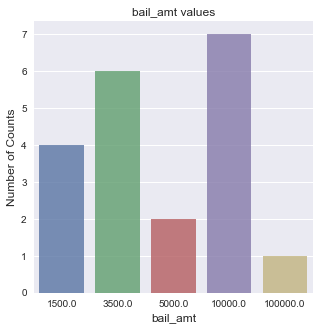

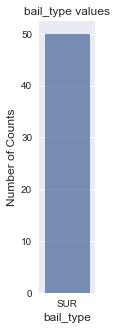

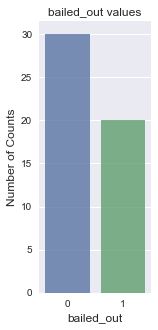

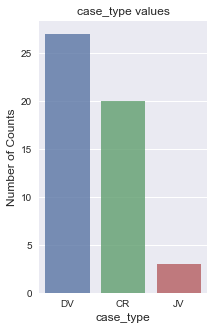

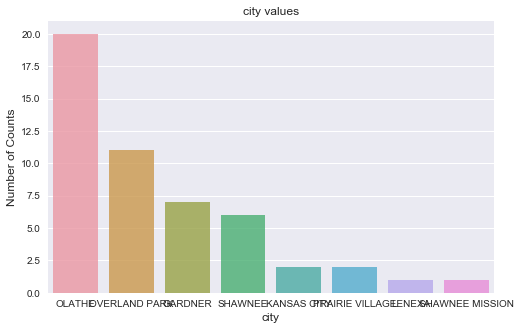

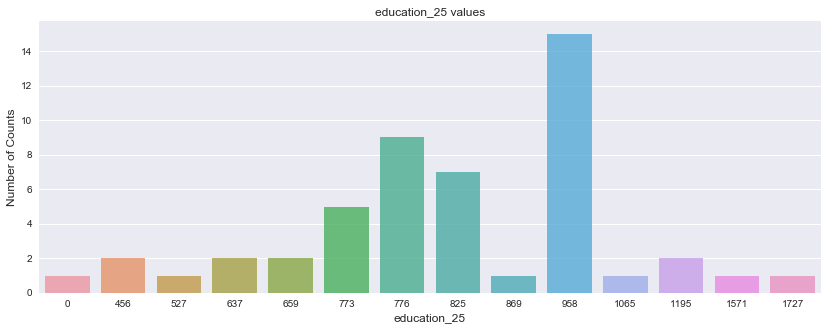

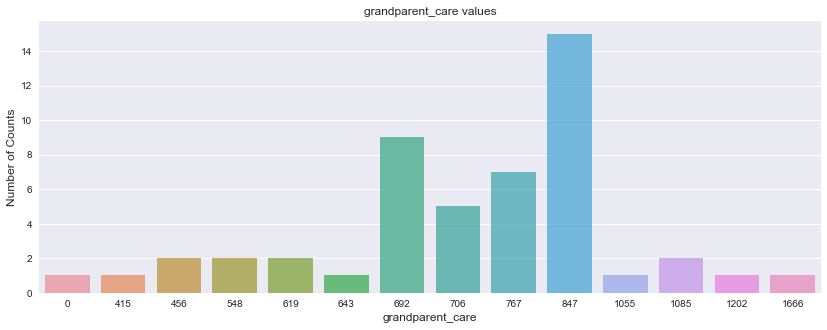

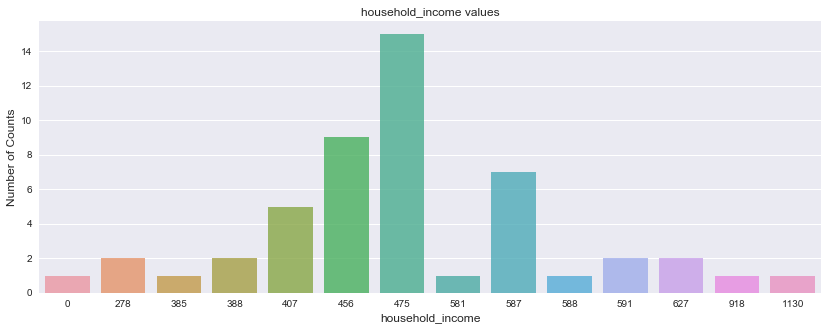

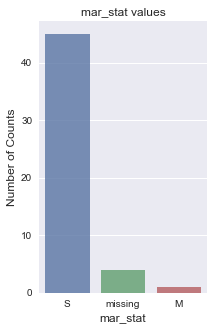

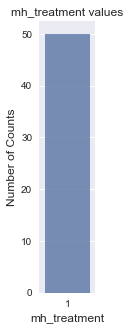

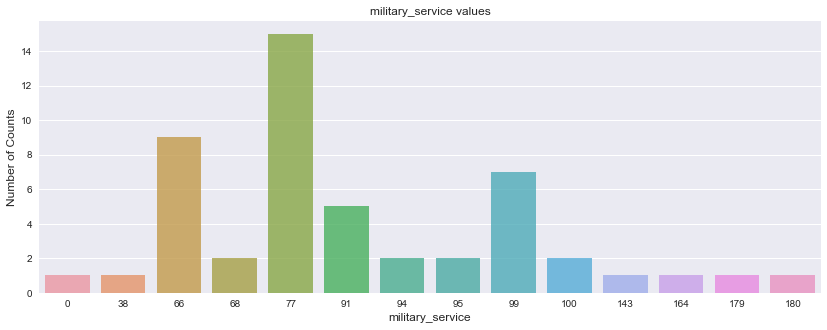

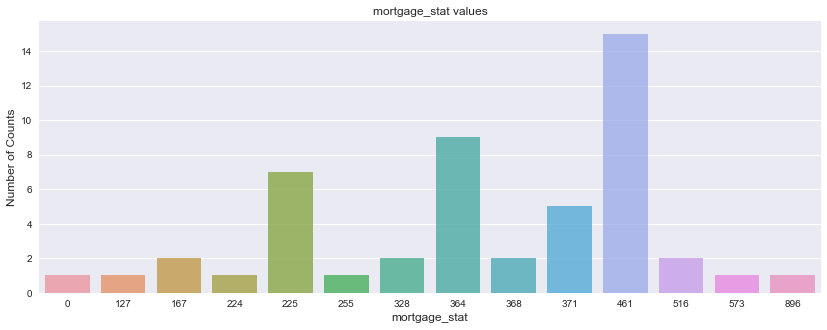

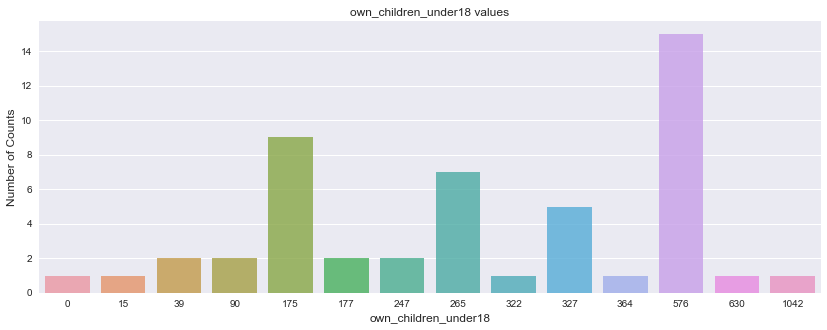

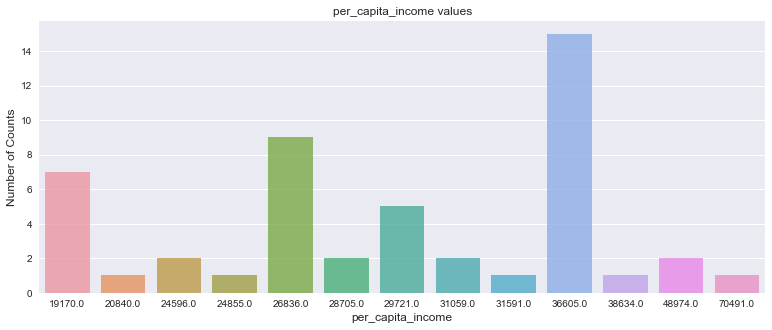

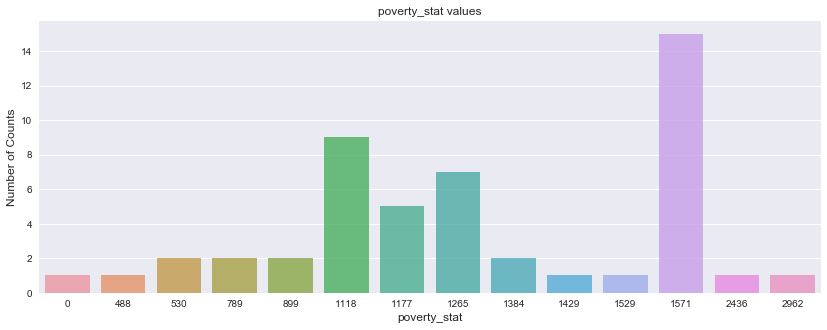

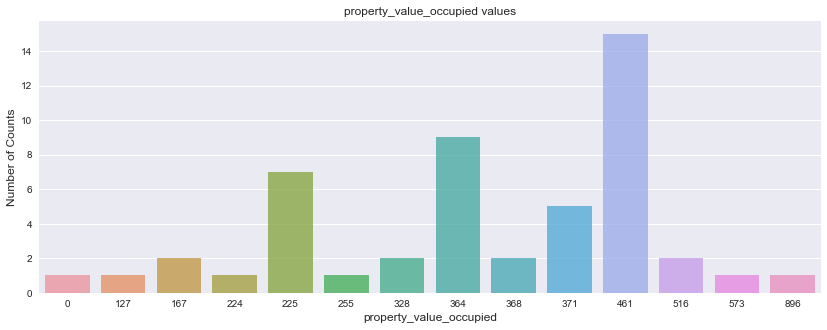

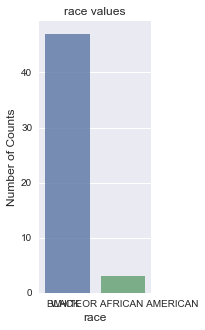

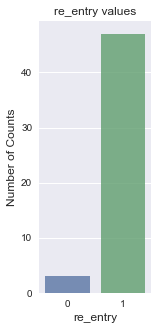

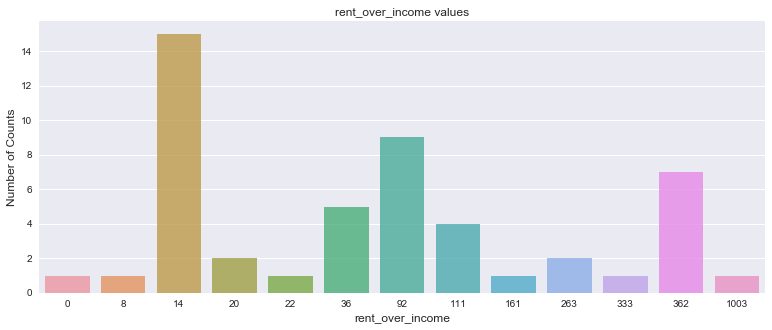

In [30]:
final_plot.plot_df(RF_df2[:50], features_to_see, save=False)

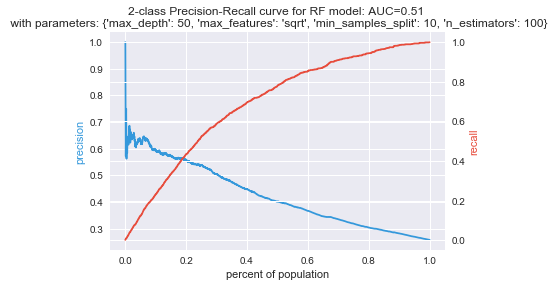

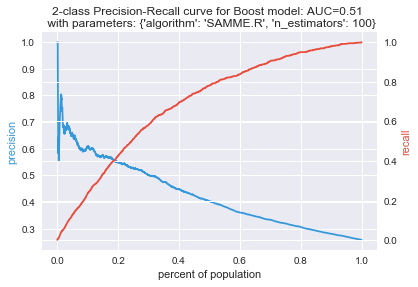

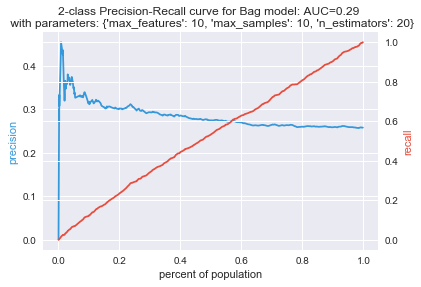

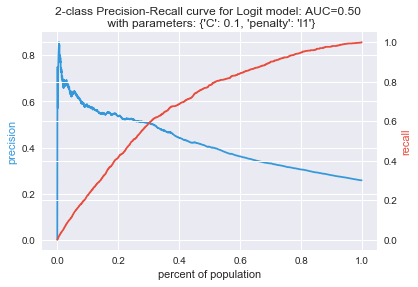

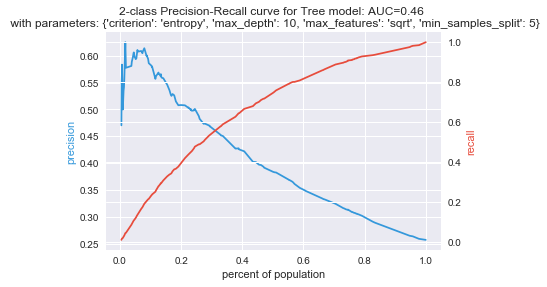

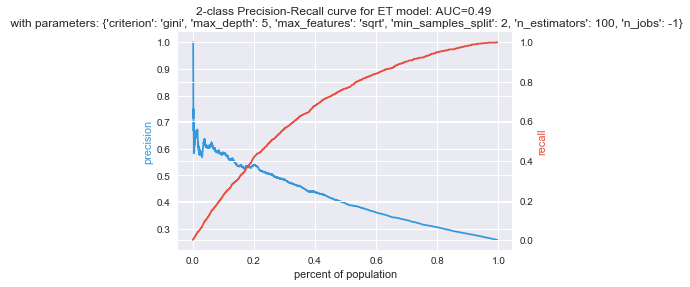

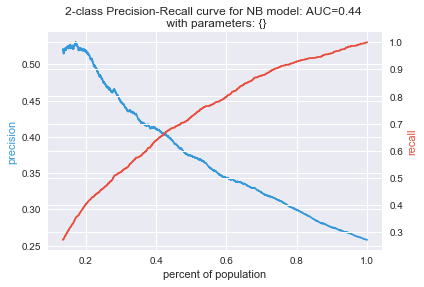

In [31]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

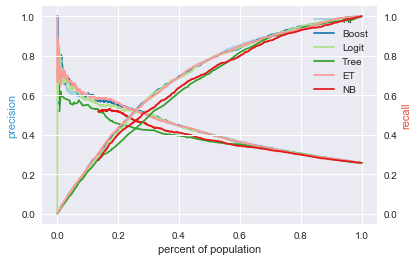

In [32]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. mh_treatment (0.079839)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.067779)
3. refferal_sourceOTHERS (0.048276)
4. bailed_out (0.034557)
5. bail_typeSUR (0.030151)
6. bail_amt_bin1 (0.023655)
7. refferal_sourceSELF (0.022820)
8. case_typeCR (0.021704)
9. bail_typePR (0.019395)
10. age_bin1 (0.019004)
11. case_typeDV (0.017332)
12. bail_amt_bin3 (0.015944)
13. age_bin4 (0.015195)
14. mar_statS (0.015145)
15. age_bin2 (0.014485)
16. bail_amt_bin2 (0.014442)
17. age_bin3 (0.014347)
18. bail_amt_bin4 (0.014246)
19. sexFEMALE (0.014111)
20. sexMALE (0.013761)


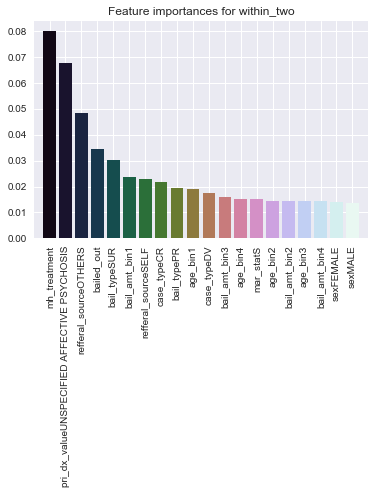

In [33]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [37]:
################Print out the Decision Tree####################

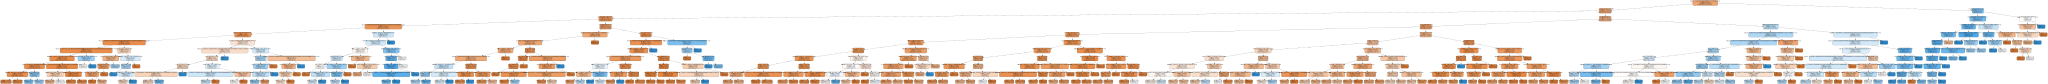

In [34]:
final_plot.print_tree(x_train, y_train["within_one"], best)